# Introduction

### Project Objective
The objective of this project is to analyze and segment households from the 2022 Survey of Consumer Finances (SCF) that have either been turned down for credit or have a fear of being denied credit. By utilizing clustering techniques, we aim to group these households into distinct clusters and examine the differences between them. This will help in understanding their financial behaviors and concerns more deeply...

### Dataset
This project uses the 2019 Survey of Consumer Finances (SCF) dataset. The specific columns of interest for this analysis include:

1. turnfear: Indicates whether a household has been turned down for credit or fears being denied credit.
2. debt: Represents the Total value of debt held by household, 2019 dollars
3. educ: Refers to the education level of the household's primary respondent.
4. houses: Total value of primary residence of household, 2019 dollars
5. inccat: Categorizes the Income percentile groups.
6. asset: Total value of assets held by household, 2019 dollars

These features will be used to segment the households and explore the differences between clusters.

### Relevance
Understanding the characteristics of households that are turned down for credit or fear credit denial is crucial for improving financial services and policies. By clustering these households based on their debt, education, housing, and income categories, this project aims to reveal distinct patterns and insights. This can help financial institutions design more tailored and effective credit products and support services, and assist policymakers in addressing issues related to credit access and financial inclusion.

# Goals
1. Identify Households with Credit Issues: Analyze the dataset to identify households that have experienced credit denial or have a fear of being denied credit. This involves filtering and classifying households based on the turnfear column.

2. Segment Households into Distinct Clusters: Utilize clustering techniques to group the identified households into distinct segments. This segmentation will be based on features such as debt, educ, houses, and inccat. The goal is to uncover patterns and differences among households with credit issues.

3. Examine Differences Between Clusters: Analyze and compare the characteristics of each cluster to understand how they differ from one another. This involves examining how features like debt levels, education, housing ownership, and income vary across different clusters.

4. Create a Web Application: Develop a web application using Dash (or another framework) to visualize the clustering results and provide an interactive interface for exploring the segmented data. The web app will allow users to view and interact with the clusters, offering insights into household profiles and credit issues.

# Applications

## Marketing and Financial Services:

1. Targeted Marketing Campaigns: Financial institutions can use the insights from the clustering analysis to tailor marketing strategies for specific segments. For example, households with high levels of debt and lower income might be targeted with financial counseling services, while those with higher education levels might receive offers for premium financial products.
2. Product Development: Understanding the distinct needs and characteristics of each cluster can inform the development of new financial products or services that address specific pain points. This could include designing credit products with more flexible terms for households experiencing credit issues.

## Credit Risk Assessment:

1. Enhanced Credit Risk Models: The segmentation can help improve credit risk assessment models by providing a more nuanced view of different customer profiles. This can lead to more accurate risk predictions and better credit scoring systems that consider various factors such as debt levels, income, and education.

## Sociological Studies:

1. Understanding Financial Behaviors: Researchers can use the findings to study how different socio-economic factors influence financial behaviors and credit issues. This can contribute to a deeper understanding of financial insecurity and the impact of education, debt, and income on credit experiences.
2. Policy Making: Policymakers can leverage the insights to develop targeted interventions and policies aimed at improving credit access and financial stability for different segments of the population. For example, policies could be designed to support households with specific financial challenges identified through the clustering analysis.

## Financial Education and Support Services:

1. Personalized Financial Advice: Financial advisors can use the segmented data to offer personalized financial advice and support. By understanding the unique needs of each cluster, advisors can provide more relevant recommendations and resources to help households manage their finances and improve their creditworthiness.

<font size="+3"><strong>Exploring the Data.</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("Survey of Consumer Finances.csv", index_col=0)
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


This dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, I am going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

In [2]:
# Creating a mask to subset the dataset to only households that have been turned down or feared being turned down for credit
mask = df["TURNFEAR"] == 1
df_fear = df[mask]

print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


In [3]:
age_groups = df["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [6 3 1 5 4 2]


Here, the unique values in the age_groups column are numeric but when I check the data dictionary, I notice they represent categorical data

![](6.1.3.png)

In [4]:
# create a version of this column that uses the actual group names.
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

# replace the old labels with the new ones in the 'agecl_dict' dictionary
age_cl = df_fear["AGECL"].replace(agecl_dict)

print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

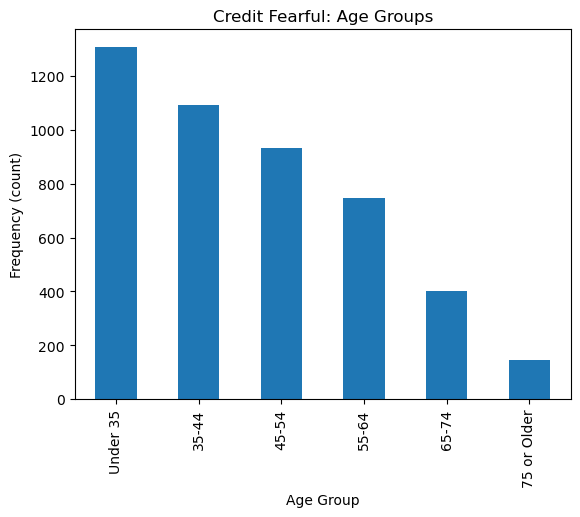

In [5]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`

age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful: Age Groups"
);

This chart shows that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more detailed understanding of the data.

To do that, we'll need to look at a different variable: `"AGE"`. Whereas `"AGECL"` was a categorical variable, `"AGE"` is continuous

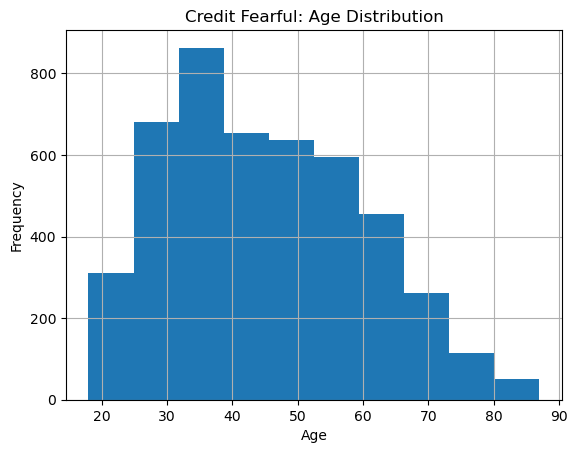

In [7]:
# Plot histogram of "AGE" with 10 bins to spread out the ages
df_fear["AGE"].hist(bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Credit Fearful: Age Distribution")
plt.show()

Here, It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are *most* concerned seem to be between 30 and 40. 

Now there is understanding of how age relates to our outcome of interest, let's try some other possibilities, starting with race. If we look at the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) for `"RACE"`, we can see that there are 4 categories.

In [11]:
# get the unique values in the age column
race_groups = df["RACE"].unique()
print("Race Groups:", race_groups)

Race Groups: [1 2 5 3]


![](6.1.7.png)

Note that there's no `4` category here. If a value for 4 *did* exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset. This is a strange omission, but it is something that one will often come across when working with large public datasets.

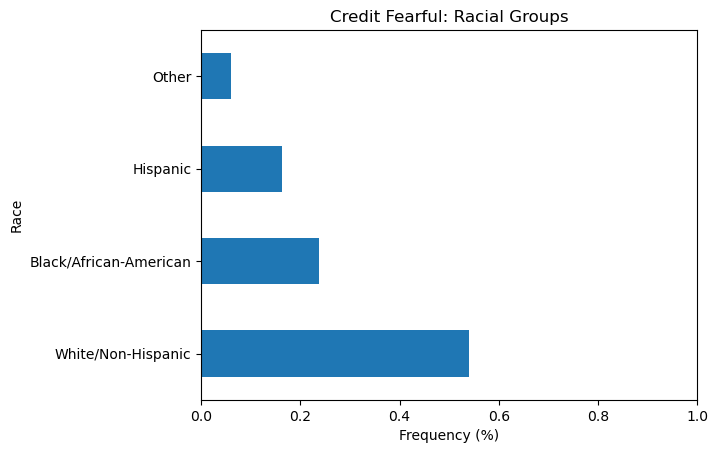

In [22]:
# Define a dictionary to map the old race codes to the new descriptive labels
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}

# Replace the old race labels in the 'RACE' column of df_fear with the new labels from race_dict
race = df_fear["RACE"].replace(race_dict)

# Calculate the normalized value counts (proportions) for each race category
race_value_counts = race.value_counts(normalize=True)

# Create a horizontal bar chart of race_value_counts
race_value_counts.plot(kind='barh')

# Set the x-axis limit to range from 0 to 1 (100%)
plt.xlim((0, 1))

# Set the labels and title of the plot
plt.xlabel("Frequency (%)")  # Label for the x-axis
plt.ylabel("Race")           # Label for the y-axis
plt.title("Credit Fearful: Racial Groups")  # Title of the plot

# Display the plot
plt.show()


This suggests that White/Non-Hispanic individuals are more concerned about being denied credit. However, upon critical reflection, this could be because White/Non-Hispanic people make up a larger portion of the U.S. population compared to other racial groups. The survey sample was designed to be representative of the overall population.

Recreating the horizontal bar chart, but this time making use of the entire dataset `df` instead of the subset `df_fear`.

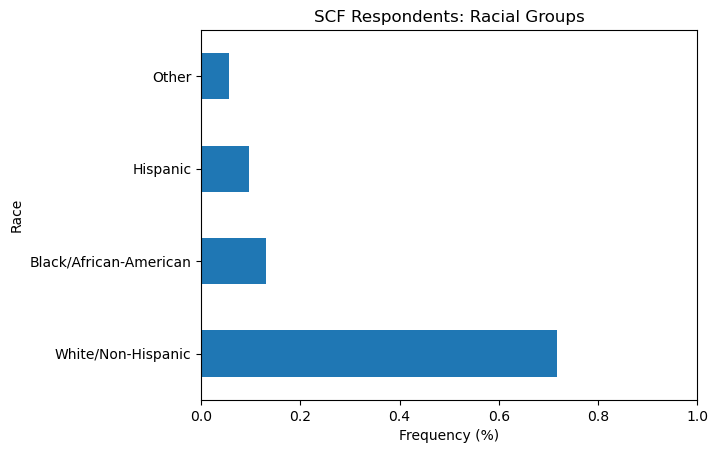

In [13]:
# replace the old labels with new ones
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)

# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

The second bar chart alters our perception of the first one in several ways. On one hand, it shows that White/Non-Hispanics make up around 70% of the entire dataset but only 54% of the respondents who are fearful about credit. On the other hand, Black and Hispanic respondents, who represent 23% of the entire dataset, account for 40% of the credit fearful respondents. This indicates that Black and Hispanic households are actually more likely to be in the credit fearful group.

## Exploring the `Income` data section

What about income level? Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the `"INCCAT"` feature, which captures income percentile groups.

![](6.1.8.png)

In [18]:
# get unique income categories
print(df['INCCAT'].unique())

[3 2 4 1 6 5]


In [19]:
# create a dictionary to hold all unique values of the income column
inccat_dict = {
    1: "0-20",       # Income category 1 corresponds to the range 0-20
    2: "21-39.9",    # Income category 2 corresponds to the range 21-39.9
    3: "40-59.9",    # Income category 3 corresponds to the range 40-59.9
    4: "60-79.9",    # Income category 4 corresponds to the range 60-79.9
    5: "80-89.9",    # Income category 5 corresponds to the range 80-89.9
    6: "90-100",     # Income category 6 corresponds to the range 90-100
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict) # Replace old labels in the 'INCCAT' column with new intuitive ones from 'inccat_dict'
    .groupby(df["TURNFEAR"]) # Group the dataframe by the 'TURNFEAR' column
    .value_counts(normalize=True) # Calculate the proportions (frequencies) of each income category within each 'TURNFEAR' group
    .rename("frequency") # Rename the resulting series to 'frequency'
    .to_frame() # Convert the series to a dataframe
    .reset_index() # Reset the index to get 'TURNFEAR', 'INCCAT', and 'frequency' as columns
)

# Print the type and shape of the resulting dataframe
print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)

# Display the resulting dataframe
df_inccat


df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


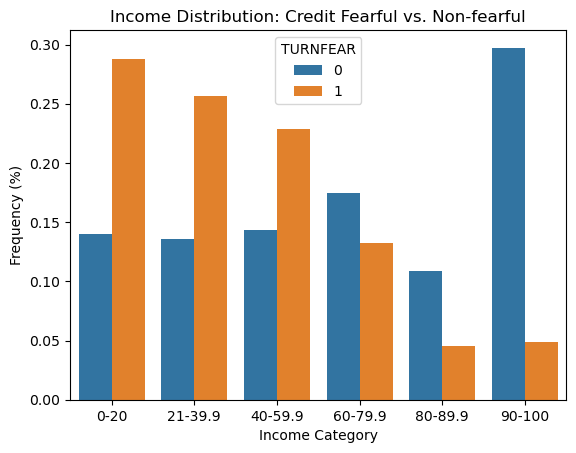

In [21]:
# first Convert TURNFEAR to type 'string' for hue to work as intended as the current type is 'int'
df_inccat["TURNFEAR"] = df_inccat["TURNFEAR"].astype(str)

# Create a bar chart of `df_inccat`
sns.barplot(
    x='INCCAT',          # Set the x-axis to be the 'INCCAT' column
    y='frequency',       # Set the y-axis to be the 'frequency' column
    hue='TURNFEAR',      # Use the 'TURNFEAR' column to distinguish between bars (hue)
    data=df_inccat,      # The data source is the 'df_inccat' dataframe
    order=inccat_dict.values()  # Order the x-axis categories based on 'inccat_dict' values
)

# Set the labels and title of the plot
plt.xlabel("Income Category")   # Label for the x-axis
plt.ylabel("Frequency (%)")     # Label for the y-axis
plt.title("Income Distribution: Credit Fearful vs. Non-fearful")  # Title of the plot

# Show the plot
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

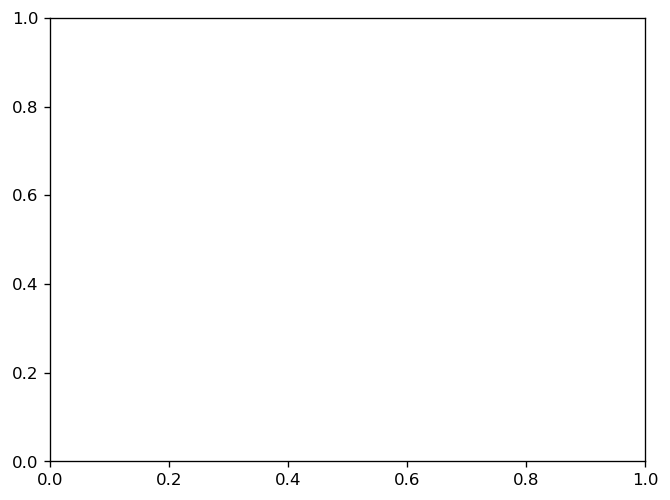

In [28]:
# Recreate using Pandas and matplotlib instead of seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
bar_width = 0.2
index = np.arange(len(df_inccat['INCCAT'].unique()))

# Define the correct order for INCCAT
inccat_order = ['0-20', '21-39.9', '40-59.9', '60-79.9', '80-89.9', '90-100']

# Convert INCCAT to ordered categorical type
df_inccat['INCCAT'] = pd.Categorical(df_inccat['INCCAT'], categories=inccat_order, ordered=True)

# Sort DataFrame by INCCAT to ensure correct order
df_inccat.sort_values('INCCAT', inplace=True)

# Create the bars
fig, ax = plt.subplots(dpi=120)
bars1 = ax.bar(index, df_inccat[df_inccat['TURNFEAR']==0]['frequency'], bar_width, label='TurnFear 0')
bars2 = ax.bar(index + bar_width, df_inccat[df_inccat['TURNFEAR']==1]['frequency'], bar_width, label='TurnFear 1')

# Add labels, title, and legend
ax.set_xlabel('Income Category')
ax.set_ylabel('Frequency %')
ax.set_title('Income Distribution: Credit Fearful vs. Non-fearful')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_inccat['INCCAT'].unique())
ax.legend()

# Show plot
plt.show()


In [29]:
# Debugging step to check the content of the dataframes
print("TURNFEAR == 0")
print(df_inccat[df_inccat['TURNFEAR'] == 0])
print("TURNFEAR == 1")
print(df_inccat[df_inccat['TURNFEAR'] == 1])

TURNFEAR == 0
Empty DataFrame
Columns: [TURNFEAR, INCCAT, frequency]
Index: []
TURNFEAR == 1
Empty DataFrame
Columns: [TURNFEAR, INCCAT, frequency]
Index: []


<div class="alert alert-block alert-warning">
    
I previously converted the data type for 'turnfear' to string when plotting the bar chart for the hue data, so i need to take that into notice
    
</div>

In [33]:
# Debugging step to check the content of the dataframes
print("TURNFEAR == 0")
print(df_inccat[df_inccat['TURNFEAR'] == '0'])
print("TURNFEAR == 1")
print(df_inccat[df_inccat['TURNFEAR'] == '1'])

TURNFEAR == 0
  TURNFEAR   INCCAT  frequency
3        0     0-20   0.140343
4        0  21-39.9   0.135933
2        0  40-59.9   0.143146
1        0  60-79.9   0.174841
5        0  80-89.9   0.108441
0        0   90-100   0.297296
TURNFEAR == 1
   TURNFEAR   INCCAT  frequency
6         1     0-20   0.288125
7         1  21-39.9   0.256327
8         1  40-59.9   0.228856
9         1  60-79.9   0.132598
11        1  80-89.9   0.045209
10        1   90-100   0.048886


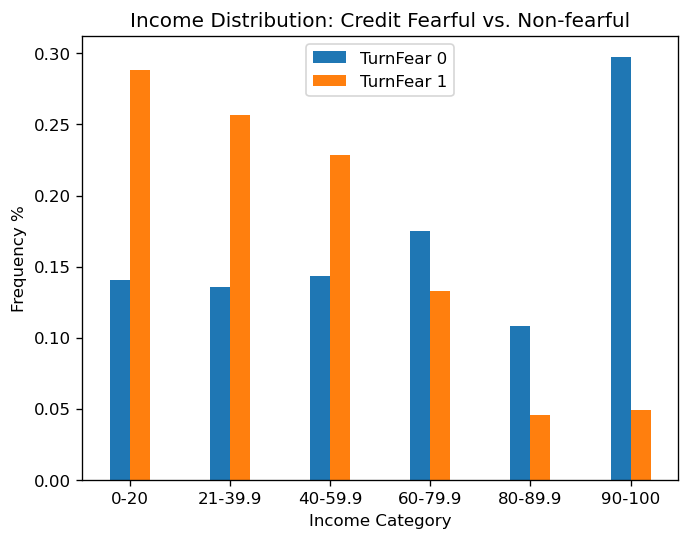

In [30]:
# Recreate using Pandas and matplotlib instead of seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
bar_width = 0.2
index = np.arange(len(df_inccat['INCCAT'].unique()))

# Define the correct order for INCCAT
inccat_order = ['0-20', '21-39.9', '40-59.9', '60-79.9', '80-89.9', '90-100']

# Convert INCCAT to ordered categorical type
df_inccat['INCCAT'] = pd.Categorical(df_inccat['INCCAT'], categories=inccat_order, ordered=True)

# Sort DataFrame by INCCAT to ensure correct order
df_inccat.sort_values('INCCAT', inplace=True)

# Create the bars
fig, ax = plt.subplots(dpi=120)
bars1 = ax.bar(index, df_inccat[df_inccat['TURNFEAR']=='0']['frequency'], bar_width, label='TurnFear 0')
bars2 = ax.bar(index + bar_width, df_inccat[df_inccat['TURNFEAR']=='1']['frequency'], bar_width, label='TurnFear 1')

# Add labels, title, and legend
ax.set_xlabel('Income Category')
ax.set_ylabel('Frequency %')
ax.set_title('Income Distribution: Credit Fearful vs. Non-fearful')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_inccat['INCCAT'].unique())
ax.legend()

# Show plot
plt.show()


## Analysis of Income Categories Across Fearful and Non-Fearful Groups

Upon comparing the income categories between the fearful and non-fearful groups, it becomes evident that credit-fearful households are significantly more prevalent in the lower income categories. This indicates that individuals who fear being denied credit typically have lower incomes.

From the data, we observe that among those who expressed concern about being approved for credit—following a denial within the past five years—a notable proportion are young and have lower incomes. This finding aligns with the expectation that younger individuals, who generally earn less and rely more on credit to establish their financial footing, are more anxious about future credit denials.

In summary, the analysis reveals a clear correlation between credit fearfulness and lower income levels, particularly among younger respondents. This insight highlights the financial vulnerabilities faced by younger, lower-income households in the context of credit access.

In [39]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
7320,1472,14721,4614.611701,1,50,3,13,4,1,2,...,3,6,4,5,2,7,10,9,4,4
7321,1472,14722,4882.411524,1,50,3,13,4,1,2,...,3,6,4,5,2,7,10,9,4,4
7322,1472,14723,4836.640962,1,50,3,13,4,1,2,...,3,6,4,5,2,7,10,9,4,4
7323,1472,14724,4785.396688,1,50,3,13,4,1,2,...,3,6,4,5,2,7,10,9,4,4
7324,1472,14725,4888.962285,1,50,3,13,4,1,2,...,3,6,4,5,2,7,10,9,4,4


In [43]:
# Identify cells with missing values
missing_cells = df.isna().stack()
missing_cells = missing_cells[missing_cells]
missing_cells

7320  WILSH    True
7321  WILSH    True
7322  WILSH    True
7323  WILSH    True
7324  WILSH    True
dtype: bool

In [44]:
df.loc[7320:7324, 'WILSH']

7320   NaN
7321   NaN
7322   NaN
7323   NaN
7324   NaN
Name: WILSH, dtype: float64

## Exploring Assets

In addition to demographics, it's essential to examine the financial aspects of the respondents. If you were working for a bank, the primary concern would likely be the individuals' capacity to manage more debt rather than their age. To develop a model assessing this capability, it's crucial to understand the relationships between various variables, and correlation matrices provide a valuable starting point for this analysis.

To get a broader perspective, we'll expand our focus beyond those who responded "yes" to the "TURNFEAR" question and include all respondents. This will enable us to perform a more comprehensive analysis. Let's start by cleaning the dataset and running a correlation analysis.

In [57]:
# Clean the dataset
df_clean = df.dropna()

# Select relevant columns for correlation analysis
correlation_columns = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
df_correlation = df_clean[correlation_columns]

# Run the correlation analysis
correlation_matrix = df_correlation.corr()

# Plot the correlation matrix
correlation_matrix.style.background_gradient(axis=None)


,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519826,0.622429,0.261252,0.116713
HOUSES,0.519826,1.000000,0.247852,0.266661,0.169331
INCOME,0.622429,0.247852,1.000000,0.114646,0.069420
DEBT,0.261252,0.266661,0.114646,1.000000,0.054177
EDUC,0.116713,0.169331,0.069420,0.054177,1.000000


Making a correlation matrix using `df_fear`.

In [58]:
corr_df_fear = df_fear[correlation_columns].corr()
corr_df_fear.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


## Notable Differences in Relationships
The correlation analysis reveals some significant differences between the overall dataset and the subset of credit-fearful respondents ("TURNFEAR"). Specifically, the relationship between "DEBT" and "HOUSES" is much stronger in the credit-fearful subset:

Overall Dataset (df): The correlation coefficient between "DEBT" and "HOUSES" is 0.26, indicating a weak positive relationship.
Credit-Fearful Subset (df_fear): The correlation coefficient between "DEBT" and "HOUSES" is 0.96, indicating a very strong positive relationship.
A coefficient close to 1.0 means that the value of the primary residence and the total debt held by the household are nearly the same for credit-fearful respondents, suggesting that their main source of debt is their primary residence.

Other notable differences include the relationships between "DEBT" and "ASSET", and "EDUC" and "DEBT", which show striking contrasts that would be of interest to financial institutions.

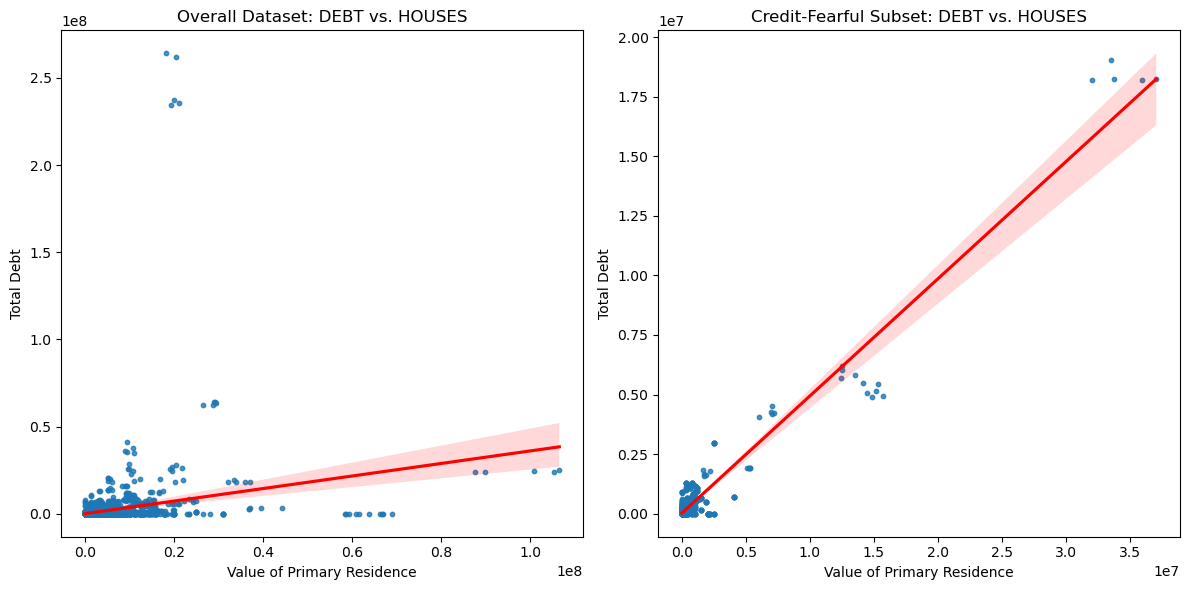

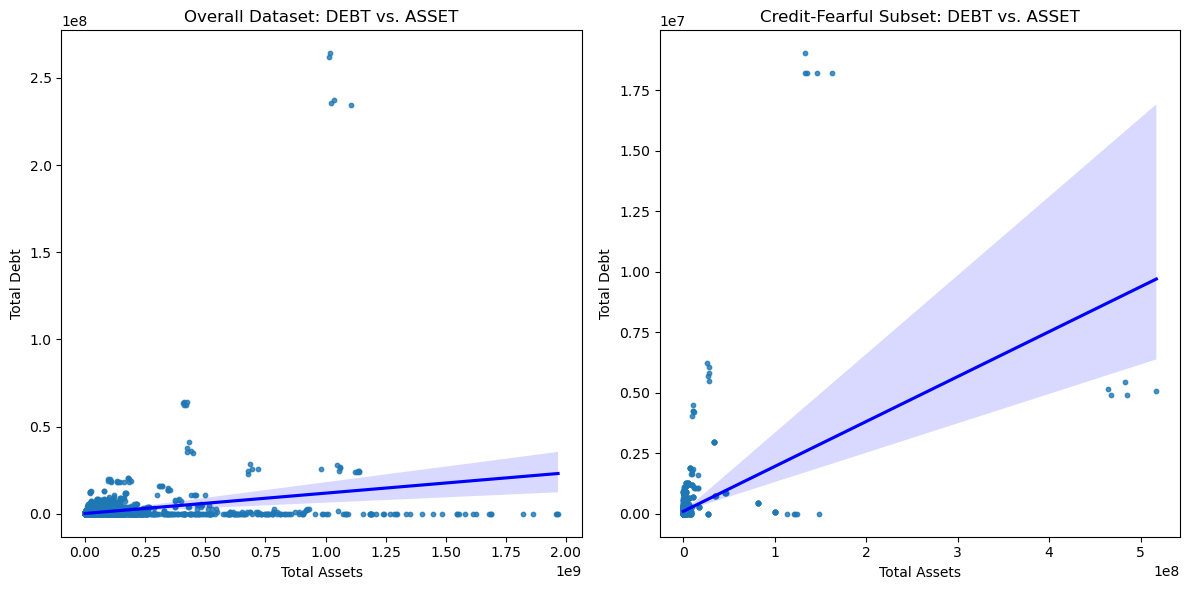

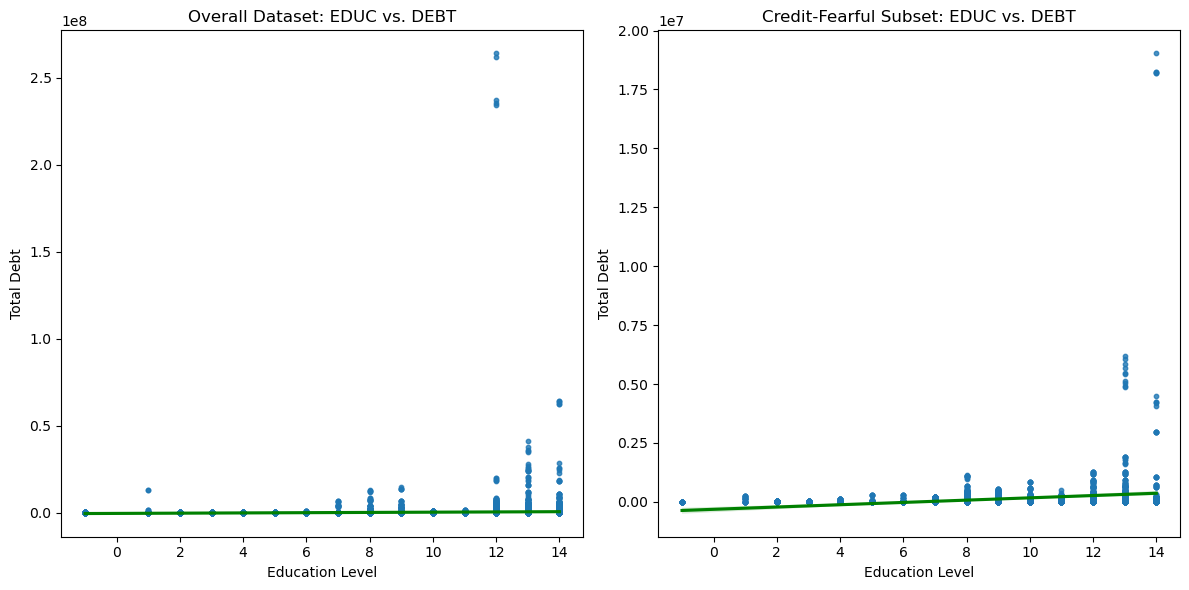

In [59]:
# Scatter plot for DEBT vs. HOUSES
plt.figure(figsize=(12, 6))

# Overall dataset
plt.subplot(1, 2, 1)
sns.regplot(x='HOUSES', y='DEBT', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Overall Dataset: DEBT vs. HOUSES')
plt.xlabel('Value of Primary Residence')
plt.ylabel('Total Debt')

# Credit-fearful subset
plt.subplot(1, 2, 2)
sns.regplot(x='HOUSES', y='DEBT', data=df_fear, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Credit-Fearful Subset: DEBT vs. HOUSES')
plt.xlabel('Value of Primary Residence')
plt.ylabel('Total Debt')

plt.tight_layout()
plt.show()

# Scatter plot for DEBT vs. ASSET
plt.figure(figsize=(12, 6))

# Overall dataset
plt.subplot(1, 2, 1)
sns.regplot(x='ASSET', y='DEBT', data=df, scatter_kws={'s':10}, line_kws={"color":"blue"})
plt.title('Overall Dataset: DEBT vs. ASSET')
plt.xlabel('Total Assets')
plt.ylabel('Total Debt')

# Credit-fearful subset
plt.subplot(1, 2, 2)
sns.regplot(x='ASSET', y='DEBT', data=df_fear, scatter_kws={'s':10}, line_kws={"color":"blue"})
plt.title('Credit-Fearful Subset: DEBT vs. ASSET')
plt.xlabel('Total Assets')
plt.ylabel('Total Debt')

plt.tight_layout()
plt.show()

# Scatter plot for EDUC vs. DEBT
plt.figure(figsize=(12, 6))

# Overall dataset
plt.subplot(1, 2, 1)
sns.regplot(x='EDUC', y='DEBT', data=df, scatter_kws={'s':10}, line_kws={"color":"green"})
plt.title('Overall Dataset: EDUC vs. DEBT')
plt.xlabel('Education Level')
plt.ylabel('Total Debt')

# Credit-fearful subset
plt.subplot(1, 2, 2)
sns.regplot(x='EDUC', y='DEBT', data=df_fear, scatter_kws={'s':10}, line_kws={"color":"green"})
plt.title('Credit-Fearful Subset: EDUC vs. DEBT')
plt.xlabel('Education Level')
plt.ylabel('Total Debt')

plt.tight_layout()
plt.show()


It is clear that "HOUSES" and "DEBT" have a very high positive correlation, as evidenced by the correlation coefficient of 0.96 among the credit-fearful group. This strong correlation suggests that for these households, a significant portion of their total debt is closely tied to the value of their primary residence.

In practical terms, this implies that credit-fearful individuals may be heavily reliant on their home as a major asset and possibly a source of borrowing. This reliance could be contributing to their anxiety about credit approval, as their financial stability is closely linked to the value and debt associated with their property.

In contrast, the correlation between "HOUSES" and "DEBT" for the entire dataset is much weaker, at 0.26, indicating that, more broadly, the relationship between home value and total debt is less pronounced outside of the credit-fearful group.

This distinction highlights that the credit-fearful households are more likely to be in situations where their debt levels are significantly impacted by the value of their home, which might be a key area of concern for lenders or financial advisors when assessing the creditworthiness of these individuals.

In [76]:
df.EDUC.head()

0    12
1    12
2    12
3    12
4    12
Name: EDUC, dtype: int64

Starting with education levels `"EDUC"`, comparing credit fearful and non-credit fearful groups.

![](6.1.15.png)

In [69]:
# Create a DataFrame to analyze the frequency distribution of education levels (EDUC) across different credit fear (TURNFEAR) groups

# Group by 'TURNFEAR' and count the occurrences of each education level, normalizing to get the frequency
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])  # Group the EDUC column by the TURNFEAR column
    .value_counts(normalize=True)  # Calculate the relative frequency of each education level within each group
    .rename("frequency")  # Rename the resulting series to 'frequency'
    .to_frame()  # Convert the series to a DataFrame
    .reset_index()  # Reset the index to convert the groupby indices to columns
)

# Print the type and shape of the resulting DataFrame for verification
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)

# Display the DataFrame
df_educ


df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117
5,0,10,0.051150
6,0,11,0.046492
7,0,7,0.019578
8,0,4,0.012035
9,0,6,0.011953


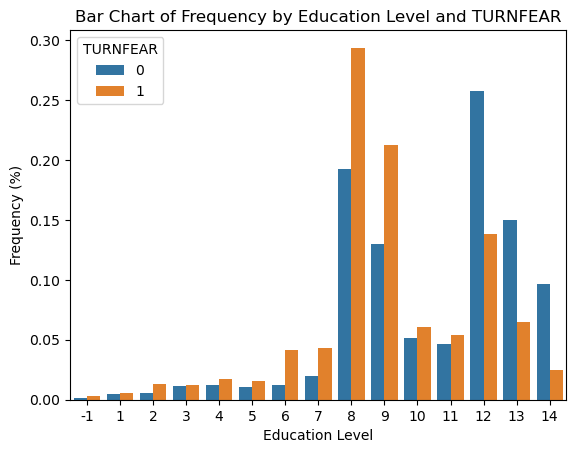

In [67]:
df_educ['TURNFEAR'] = df_educ['TURNFEAR'].astype(str)

sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Bar Chart of Frequency by Education Level and TURNFEAR")
plt.show()


In the plot, it is evident that a significantly larger proportion of respondents who fear credit denial hold only a high school diploma(taking a look at the label data). Conversely, individuals with university degrees are more prevalent among those who do not experience credit fear. This suggests that higher education levels are associated with lower levels of credit anxiety.

In [70]:
df['DEBT'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEBT, dtype: float64

## Exploring Debt
In this analysis, we'll delve into the debt-related characteristics of households, focusing on their overall debt and how it relates to their financial situation. Debt is a crucial factor in understanding financial stability and risk, so it's essential to investigate how it correlates with other variables such as assets, education, and income.

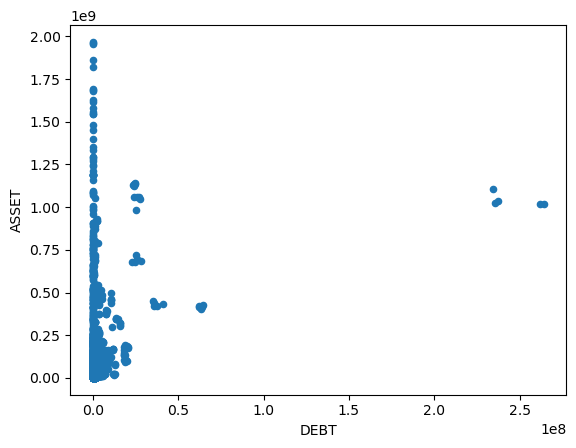

In [72]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT", y="ASSET");

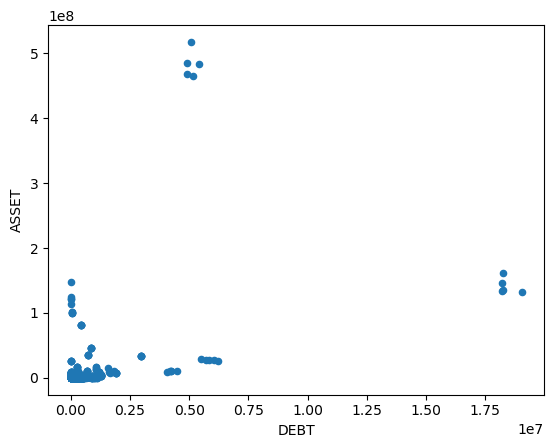

In [71]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="ASSET");

You can see that the relationship in our df_fear graph is flatter compared to the one in our df graph, but it is still evident that they are distinct.

To illustrate this more clearly, we'll create scatter plots to visualize the difference between "HOUSES" and "DEBT" for both datasets. This will help us visually compare how these relationships differ between the overall population and those who are fearful of credit.

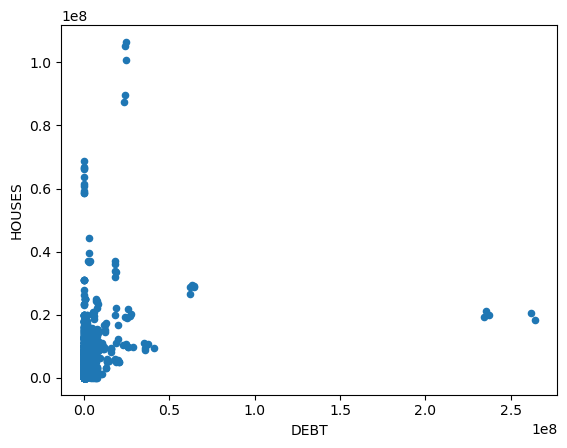

In [73]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y="HOUSES");

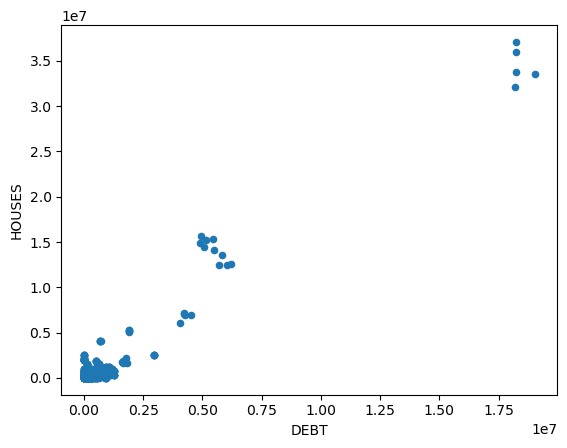

In [74]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y="HOUSES");

The outliers make it a bit tricky to spot the differences between these two plots, but the relationship is still quite clear. The df_fear plot reveals an almost perfect linear relationship between "HOUSES" and "DEBT", while the df plot shows a more dispersed pattern.

What really catches my eye is how the data points in the df_fear graph seem to form distinct clusters. These clusters suggest that there might be different subgroups within the credit-fearful population, each with its own characteristics. This observation opens up an exciting avenue for further exploration. I’m eager to dive into clustering analysis in the next project to uncover these subgroups and understand what they can tell us about the credit-fearful households.

## DATA DICTIONARY

| Feature | Description |
| :------ | :---------- |
| [**`ACTBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ACTBUS) | Total value of actively managed business(es), 2019 dollars |
| [**`AGE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGE) | Age of reference person |
| [**`AGECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGECL) | Age group of the reference person |
| [**`ANNUIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANNUIT) | Amount R would receive if they cashed in annuities, 2019 dollars |
| [**`ANYPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANYPEN) | Pension exists for either reference person or spouse |
| [**`ASSET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSET) | Total value of assets held by household, 2019 dollars |
| [**`ASSETCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSETCAT) | Asset percentile groups |
| [**`BCALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BCALL) | Information used for borrowing decisions | call around |
| [**`BDONT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BDONT) | Information used for borrowing decisions | never borrow |
| [**`BFINPLAN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPLAN) | Information used for borrowing decisions | lawyer, accountant, financial planner |
| [**`BFINPRO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPRO) | Information used for borrowing decisions | banker, broker, real estate broker, builder, dealer, insurance agent |
| [**`BFRIENDWORK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFRIENDWORK) | Information used for borrowing decisions | friends, material from work/business contacts |
| [**`BINTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BINTERNET) | Information used for borrowing decisions | internet/online service |
| [**`BMAGZNEWS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAGZNEWS) | Information used for borrowing decisions | magazines, newspapers, books |
| [**`BMAILADTV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAILADTV) | Information used for borrowing decisions | material in mail, TV, radio, advertisements, telemarketer |
| [**`BNKRUPLAST5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#BNKRUPLAST5) | Household has declared bankruptcy in the past 5 years |
| [**`BOND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BOND) | Total value of directly held bonds held by household, 2019 dollars |
| [**`BOTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BOTHER) | Information used for borrowing decisions | other sources |
| [**`BPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BPLANCJ) | Either reference person or spouse/partner has both types of pension plan on a current job |
| [**`BSELF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSELF) | Information used for borrowing decisions | self, shop around, other personal research |
| [**`BSHOPGRDL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPGRDL) | Shopping for borrowing and credit | great deal of shopping |
| [**`BSHOPMODR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPMODR) | Shopping for borrowing and credit | moderate shopping |
| [**`BSHOPNONE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPNONE) | Shopping for borrowing and credit | almost no shopping |
| [**`BUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUS) | Total value of business(es) in which the household has either an active or nonactive interest, 2019 dollars |
| [**`BUSSEFARMINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#BUSSEFARMINC) | Income from business, sole proprietorship, and farm, 2019 dollars |
| [**`BUSVEH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUSVEH) | Household has vehicle(s) owned by business |
| [**`CALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CALL) | Total value of call accounts held by household, 2019 dollars |
| [**`CANTMANG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CANTMANG) | Why no checking account | can't manage/balance a checking account |
| [**`CASEID`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CASEID) | Case ID (numeric) |
| [**`CASHLI`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CASHLI) | Total cash value of whole life insurance held by household, 2019 dollars |
| [**`CCBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#CCBAL) | Total value of credit card balances held by household, 2019 dollars |
| [**`CDS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CDS) | Total value of certificates of deposit held by household, 2019 dollars |
| [**`CHECKING`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CHECKING) | Total value of checking accounts held by household, 2019 dollars |
| [**`CKCONNECTN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONNECTN) | Why chose main checking account institution | connection through work/school |
| [**`CKCONVPAYRL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONVPAYRL) | Why chose main checking account institution | other convenience, payroll deduction/direct deposit |
| [**`CKLOCATION`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOCATION) | Why chose main checking account institution | location of their offices |
| [**`CKLONGTIME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLONGTIME) | Why chose main checking account institution | always done business there, banked there a long time |
| [**`CKLOWFEEBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOWFEEBAL) | Why chose main checking account institution | had the lowest fees/minimum balance requirement |
| [**`CKMANYSVCS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKMANYSVCS) | Why chose main checking account institution | able to obtain many services at one place |
| [**`CKOTHCHOOSE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKOTHCHOOSE) | Why chose main checking account institution | other reason |
| [**`CKPERSONAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKPERSONAL) | Why chose main checking account institution | personal relationship |
| [**`CKRECOMFRND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKRECOMFRND) | Why chose main checking account institution | recommended, friend/family has account there |
| [**`CKSAFETY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKSAFETY) | Why chose main checking account institution | offered safety and absence of risk |
| [**`COMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#COMUTF) | amount in combination and other mutual funds, 2019 dollars |
| [**`CONSPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#CONSPAY) | total monthly consumer debt payments, 2019 dollars |
| [**`CPI_DEFL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CPI_DEFL) | Deflator Value |
| [**`CREDIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CREDIT) | Why no checking account | credit problems, bankruptcy, does not meet qualifications for an account |
| [**`CURRPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CURRPEN) | current value in pension, 2019 dollars |
| [**`DBPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANCJ) | Either reference person or spouse/partner has a defined benefit pension on a current job |
| [**`DBPLANT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANT) | Either reference person or spouse/partner has DB plan on current job or some type of pension from a past job to be received in the future |
| [**`DCPLANCJ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DCPLANCJ) | Either reference person or spouse/partner has any type of account-based plan on a current job |
| [**`DEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#DEBT) | Total value of debt held by household, 2019 dollars |
| [**`DEBT2INC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#DEBT2INC) | Ratio of total debt to total income |
| [**`DEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DEQ) | Total value of equity in directly held stocks, stock mutual funds, and combination mutual funds held by household, 2019 dollars |
| [**`DONTLIKE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTLIKE) | Why no checking account | don't like dealing with banks |
| [**`DONTWANT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWANT) | Why no checking account | does not want/need a checking account |
| [**`DONTWRIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWRIT) | Why no checking account | don't write enough checks to make it worthwhile |
| [**`EDCL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDCL) | Education category of reference person |
| [**`EDN_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#EDN_INST) | Total value of education loans held by household, 2019 dollars |
| [**`EDUC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDUC) | Highest completed grade by reference person |
| [**`EHCHKG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#EHCHKG) | people w/o checking accounts | ever had an account? |
| [**`EMERGBORR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGBORR) | Respondent would borrow money in a hypothetical financial emergency |
| [**`EMERGCUT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGCUT) | Respondent would cut back spending in a hypothetical financial emergency |
| [**`EMERGPSTP`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGPSTP) | Respondent would postpone payments in a hypothetical financial emergency |
| [**`EMERGSAV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGSAV) | Respondent would spend out of savings in a hypothetical financial emergency |
| [**`EQUITINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITINC) | ratio of equity to normal income |
| [**`EQUITY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITY) | Total value of financial assets held by household that are invested in stock, 2019 dollars |
| [**`EXPENSHILO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EXPENSHILO) | Households overall expenses over last 12 months |
| [**`FAMSTRUCT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FAMSTRUCT) | Family structure of household |
| [**`FARMBUS_KG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#FARMBUS_KG) | capital gains on farm businesses, 2019 dollars |
| [**`FARMBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#FARMBUS) | compute value of business part of farm net of outstanding mortgages, 2019 dollars |
| [**`FEARDENIAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FEARDENIAL) | Household feared being denied credit in the past 5 years |
| [**`FIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FIN) | Total value of financial assets held by household, 2019 dollars |
| [**`FINLIT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#FINLIT) | Number of financial literacy questions answered correctly |
| [**`FOODAWAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODAWAY) | Total amount spent on food away from home, annualized, 2019 dollars |
| [**`FOODDELV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODDELV) | Total amount spent on food delivered to home, annualized, 2019 dollars |
| [**`FOODHOME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODHOME) | Total amount spent on food at home, annualized, 2019 dollars |
| [**`FORECLLAST5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FORECLLAST5) | Respondent had a foreclosure in the last five years |
| [**`FUTPEN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FUTPEN) | future pensions (accumulated in an account for the R/S), 2019 dollars |
| [**`GBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GBMUTF) | amount in government bond mutual funds, 2019 dollars |
| [**`GOVTBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GOVTBND) | US government and government agency bonds and bills, 2019 dollars |
| [**`HBORRALT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRALT) | Respondent would borrow money from alternative sources in a hypothetical financial emergency |
| [**`HBORRCC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRCC) | Respondent would borrow money using a credit card in a hypothetical financial emergency |
| [**`HBORRFF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFF) | Respondent would borrow money from friends or family in a hypothetical financial emergency |
| [**`HBORRFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFIN) | Respondent would borrow money from financial services in a hypothetical financial emergency |
| [**`HBROK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBROK) | have a brokerage account |
| [**`HBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBUS) | Have active or non-actively managed business(es) |
| [**`HCUTENT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTENT) | Respondent would postpone payments for entertainment in a hypothetical financial emergency |
| [**`HCUTFOOD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTFOOD) | Respondent would cut back on food purchases in a hypothetical financial emergency |
| [**`HCUTOTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTOTH) | Respondent would postpone other payments in a hypothetical financial emergency |
| [**`HDEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HDEBT) | Household has any debt |
| [**`HELOC_YN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC_YN) | Currently borrowing on home equity line of credit |
| [**`HELOC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC) | Total value of home equity lines of credit secured by the primary residence held by the household, 2019 dollars |
| [**`HHSEX`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HHSEX) | Gender of household reference person |
| [**`HLIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HLIQ) | Household has any checking, savings, money market or call accounts |
| [**`HMORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HMORT2) | Have junior lien mortgage not used for purchase of primary residence |
| [**`HOMEEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOMEEQ) | Total value of equity in primary residence of household, 2019 dollars |
| [**`HOUSECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HOUSECL) | Home-ownership category of household |
| [**`HOUSES`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOUSES) | Total value of primary residence of household, 2019 dollars |
| [**`HPAYDAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPAYDAY) | Household had a payday loan within the past year |
| [**`HPRIM_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPRIM_MORT) | Have first lien mortgage on primary residence |
| [**`HPSTPLN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPLN) | Respondent would postpone payments on loans in a hypothetical financial emergency |
| [**`HPSTPOTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPOTH) | Respondent would postpone other payments in a hypothetical financial emergency |
| [**`HPSTPPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPPAY) | Respondent would postpone payments for purchases in a hypothetical financial emergency |
| [**`HSAVFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVFIN) | Respondent would spend out of financial sources in a hypothetical financial emergency |
| [**`HSAVNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVNFIN) | Respondent would spend out of non-financial sources in a hypothetical financial emergency |
| [**`HSEC_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HSEC_MORT) | Have junior lien mortgage on primary residence |
| [**`HSTOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HSTOCKS) | have stocks? |
| [**`HTRAD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HTRAD) | traded in the past year |
| [**`ICALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ICALL) | Information used for investing decisions | call around |
| [**`IDONT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IDONT) | Information used for investing decisions | never borrow |
| [**`IFINPLAN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPLAN) | Information used for investing decisions | lawyer, accountant, financial planner |
| [**`IFINPRO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPRO) | Information used for investing decisions | banker, broker, real estate broker, builder, dealer, insurance agent |
| [**`IFRIENDWORK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFRIENDWORK) | Information used for investing decisions | friends, material from work/business contacts |
| [**`IINTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IINTERNET) | Information used for investing decisions | internet/online service |
| [**`IMAGZNEWS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAGZNEWS) | Information used for investing decisions | magazines, newspapers, books |
| [**`IMAILADTV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAILADTV) | Information used for investing decisions | material in mail, TV, radio, advertisements, telemarketer |
| [**`INCCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCCAT) | Income percentile groups |
| [**`INCOME`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCOME) | Total amount of income of household, 2019 dollars |
| [**`INCPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCPCTLECAT) | Alternate income percentile groups |
| [**`INCQRTCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCQRTCAT) | Income quartile groups |
| [**`INDCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#INDCAT) | Industry classifications for reference person |
| [**`INSTALL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#INSTALL) | Total value of installment loans held by household, 2019 dollars |
| [**`INTDIVINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INTDIVINC) | Interest (taxable and nontaxable) and dividend income, 2019 dollars |
| [**`INTERNET`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#INTERNET) | Do business with financial institution via the Internet |
| [**`IOTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IOTHER) | Information used for investing decisions | other sources |
| [**`IRAKH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#IRAKH) | Total value of IRA/Keogh accounts, 2019 dollars |
| [**`ISELF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISELF) | Information used for investing decisions | self, shop around, other personal research |
| [**`ISHOPGRDL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPGRDL) | Shopping for saving and investments | great deal of shopping |
| [**`ISHOPMODR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPMODR) | Shopping for saving and investments | moderate shopping |
| [**`ISHOPNONE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPNONE) | Shopping for saving and investments | almost no shopping |
| [**`KGBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGBUS) | Unrealized capital gains or losses on businesses, 2019 dollars |
| [**`KGHOUSE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGHOUSE) | Unrealized capital gains or losses on the primary residence, 2019 dollars |
| [**`KGINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGINC) | Capital gain or loss income, 2019 dollars |
| [**`KGINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGINC) | Capital gain or loss income, 2019 dollars |
| [**`KGORE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGORE) | Unrealized capital gains or losses on other real estate, 2019 dollars |
| [**`KGSTMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGSTMF) | Unrealized capital gains or losses on stocks and mutual funds, 2019 dollars |
| [**`KGTOTAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGTOTAL) | Total unrealized capital gains or losses for the household, 2019 dollars |
| [**`KIDS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#KIDS) | Total number of children in household |
| [**`KNOWL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#KNOWL) | Respondent's knowledge of personal finances |
| [**`LATE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE) | Household had any late debt payments in last year |
| [**`LATE60`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE60) | Household had any debt payments more than 60 days past due in last year |
| [**`LEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LEASE) | have leased vehicle |
| [**`LEVRATIO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#LEVRATIO) | Ratio of total debt to total assets |
| [**`LF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LF) | Labor force participation of reference person |
| [**`LIFECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LIFECL) | Life cycle of reference person |
| [**`LIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#LIQ) | Total value of all types of transactions accounts, 2019 dollars |
| [**`LLOAN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN1) | Total balance of household loans where the lender is a commercial bank, 2019 dollars |
| [**`LLOAN10`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN10) | Total balance of household loans where the lender is a store and/or a credit card, 2019 dollars |
| [**`LLOAN11`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN11) | Total balance of household loans where the lender is a pension, 2019 dollars |
| [**`LLOAN12`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN12) | Total balance of household loans where the lender is other, unclassifiable, or foreign, 2019 dollars |
| [**`LLOAN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN2) | Total balance of household loans where the lender is saving and loan, 2019 dollars |
| [**`LLOAN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN3) | Total balance of household loans where the lender is credit union, 2019 dollars |
| [**`LLOAN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN4) | Total balance of household loans where the lender is finance, loan or leasing company, or inc debt consolidator, 2019 dollars |
| [**`LLOAN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN5) | Total balance of household loans where the lender is a brokerage and/or life insurance company, 2019 dollars |
| [**`LLOAN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN6) | Total balance of household loans where the lender is a real estate company, 2019 dollars |
| [**`LLOAN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN7) | Total balance of household loans  where the lender is an individual, 2019 dollars |
| [**`LLOAN8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN8) | Total balance of household loans where the lender is an other non-financial, 2019 dollars |
| [**`LLOAN9`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN9) | Total balance of household loans where the lender is government, 2019 dollars |
| [**`MARRIED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#MARRIED) | Marital status of reference person |
| [**`MINBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#MINBAL) | Why no checking account | minimum balance is too high |
| [**`MMA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMA) | Total value of money market deposit and money market mutual fund accounts, 2019 dollars |
| [**`MMDA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMDA) | money market deposit accounts, 2019 dollars |
| [**`MMMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMMF) | money market mutual funds, 2019 dollars |
| [**`MORT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT1) | Amount owed on mortgage 1, 2019 dollars |
| [**`MORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT2) | Amount owed on mortgage 2, 2019 dollars |
| [**`MORT3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT3) | Amount owed on mortgage 3, 2019 dollars |
| [**`MORTBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MORTBND) | mortgage-backed bonds, 2019 dollars |
| [**`MORTPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#MORTPAY) | total monthly mortgage payments, 2019 dollars |
| [**`MRTHEL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MRTHEL) | Total value of debt secured by the primary residence held by household, 2019 dollars |
| [**`NBUSVEH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NBUSVEH) | Total number of business vehicles held by household |
| [**`NETWORTH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NETWORTH) | Total net worth of household, 2019 dollars |
| [**`NEWCAR1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR1) | number of car/truck/SUV with model year no older than two years before the survey |
| [**`NEWCAR2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR2) | number of car/truck/SUV with model year no older than one year before the survey |
| [**`NFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NFIN) | Total value of non-financial assets held by household, 2019 dollars |
| [**`NH_MORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NH_MORT) | Total value of mortgages and home equity loans secured by the primary residence held by household, 2019 dollars |
| [**`NHNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NHNFIN) | total non-financial assets excluding principal residences, 2019 dollars |
| [**`NINCCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCCAT) | Normal income percentile groups |
| [**`NINCPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCPCTLECAT) | Alternate Normal income percentile groups |
| [**`NINCQRTCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCQRTCAT) | Normal income quartile groups |
| [**`NLEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NLEASE) | number of leased vehicles |
| [**`NMMF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NMMF) | Total value of directly held pooled investment funds held by household, 2019 dollars |
| [**`NNRESRE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NNRESRE) | Total value of net equity in nonresidential real estate held by household, 2019 dollars |
| [**`NOCCBAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCCBAL) | Household does not carry a balance on credit cards |
| [**`NOCHK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCHK) | Household has no checking account |
| [**`NOFINRISK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOFINRISK) | Respondent not willing to take financial risk |
| [**`NOMONEY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOMONEY) | Why no checking account | don't have (enough) money |
| [**`NONACTBUS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NONACTBUS) | Value of non-actively managed business(es), 2019 dollars |
| [**`NORMINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NORMINC) | Household normal income, 2019 dollars |
| [**`NOTXBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOTXBND) | tax-exempt bonds (state and local bonds), 2019 dollars |
| [**`NOWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOWN) | number of owned vehicles |
| [**`NSTOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NSTOCKS) | number different companies in which hold stock |
| [**`NTRAD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NTRAD) | number of trades per year |
| [**`NVEHIC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NVEHIC) | total number of vehicles (owned and leased) |
| [**`NWCAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWCAT) | Net worth percentile groups |
| [**`NWPCTLECAT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWPCTLECAT) | Alternate net worth percentile groups |
| [**`OBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBMUTF) | amount in other bond mutual funds, 2019 dollars |
| [**`OBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBND) | corporate and foreign bonds, 2019 dollars |
| [**`OCCAT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT1) | Occupation categories for reference person |
| [**`OCCAT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT2) | Occupation classification for reference person |
| [**`ODEBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#ODEBT) | Total value of other debts held by household, 2019 dollars |
| [**`OMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OMUTF) | amount in other mutual funds, 2019 dollars |
| [**`ORESRE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ORESRE) | Total value of other residential real estate held by household, 2019 dollars |
| [**`OTH_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTH_INST) | Total value of other installment loans held by household, 2019 dollars |
| [**`OTHER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#OTHER) | Why no checking account | other |
| [**`OTHFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHFIN) | Total value of other financial assets, 2019 dollars |
| [**`OTHLOC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTHLOC) | Total value of other lines of credit held by household, 2019 dollars |
| [**`OTHMA`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHMA) | Total value of other managed assets held by household, 2019 dollars |
| [**`OTHNFIN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHNFIN) | Total value of other non-financial assets held by household, 2019 dollars |
| [**`OWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OWN) | have an owned vehicle |
| [**`PAYEDU1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU1) | payments on first education loan, 2019 dollars |
| [**`PAYEDU2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU2) | payments on second education loan, 2019 dollars |
| [**`PAYEDU3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU3) | payments on third education loan, 2019 dollars |
| [**`PAYEDU4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU4) | payments on fourth education loan, 2019 dollars |
| [**`PAYEDU5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU5) | payments on fifth education loan, 2019 dollars |
| [**`PAYEDU6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU6) | payments on sixth education loan, 2019 dollars |
| [**`PAYEDU7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU7) | payments on seventh education loan, 2019 dollars |
| [**`PAYHI1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI1) | payments on first home improvement loan, 2019 dollars |
| [**`PAYHI2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI2) | payments on second home improvement loan, 2019 dollars |
| [**`PAYILN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN1) | payments on first installment loan, 2019 dollars |
| [**`PAYILN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN2) | payments on second installment loan, 2019 dollars |
| [**`PAYILN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN3) | payments on third installment loan, 2019 dollars |
| [**`PAYILN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN4) | payments on fourth installment loan, 2019 dollars |
| [**`PAYILN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN5) | payments on fifth installment loan, 2019 dollars |
| [**`PAYILN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN6) | payments on sixth installment loan, 2019 dollars |
| [**`PAYILN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN7) | payments on seventh installment loan, 2019 dollars |
| [**`PAYINS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYINS) | payments on loans against insurance policies, 2019 dollars |
| [**`PAYLC1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC1) | payments on first land contract, 2019 dollars |
| [**`PAYLC2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC2) | payments on second land contract, 2019 dollars |
| [**`PAYLCO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLCO) | payments on other land contracts, 2019 dollars |
| [**`PAYLOC1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC1) | payments on first line of credit, 2019 dollars |
| [**`PAYLOC2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC2) | payments on second line of credit, 2019 dollars |
| [**`PAYLOC3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC3) | payments on third line of credit, 2019 dollars |
| [**`PAYLOCO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOCO) | payments on other lines of credit, 2019 dollars |
| [**`PAYMARG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMARG) | payments on margin loans, 2019 dollars |
| [**`PAYMORT1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT1) | payments on first mortgage, 2019 dollars |
| [**`PAYMORT2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT2) | payments on second mortgage, 2019 dollars |
| [**`PAYMORT3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT3) | payments on third mortgage, 2019 dollars |
| [**`PAYMORTO`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORTO) | payments on other loans, 2019 dollars |
| [**`PAYORE1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE1) | payments on first other residential property, 2019 dollars |
| [**`PAYORE2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE2) | payments on second other residential property, 2019 dollars |
| [**`PAYORE3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE3) | payments on third other residential property, 2019 dollars |
| [**`PAYOREV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYOREV) | payments on remaining other residential properties, 2019 dollars |
| [**`PAYPEN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN1) | payments on loan against first pension plan not previously reported, 2019 dollars |
| [**`PAYPEN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN2) | payments on loan against second pension plan not previously reported, 2019 dollars |
| [**`PAYPEN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN3) | payments on loan against third pension plan not previously reported, 2019 dollars |
| [**`PAYPEN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN4) | payments on loan against fourth pension plan not previously reported, 2019 dollars |
| [**`PAYPEN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN5) | payments on loan against fifth pension plan not previously reported, 2019 dollars |
| [**`PAYPEN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN6) | payments on loan against sixth pension plan not previously reported, 2019 dollars |
| [**`PAYVEH1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH1) | payments on first vehicle, 2019 dollars |
| [**`PAYVEH2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH2) | payments on second vehicle, 2019 dollars |
| [**`PAYVEH3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH3) | payments on third vehicle, 2019 dollars |
| [**`PAYVEH4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH4) | payments on fourth vehicle, 2019 dollars |
| [**`PAYVEHM`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEHM) | payments on remaining vehicles, 2019 dollars |
| [**`PAYVEO1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO1) | payment on first other vehicle, 2019 dollars |
| [**`PAYVEO2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO2) | payment on second other vehicle, 2019 dollars |
| [**`PAYVEOM`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEOM) | payment on remaining other vehicles, 2019 dollars |
| [**`PENACCTWD`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PENACCTWD) | Withdrawals from IRAs and tax-deferred pension accounts, 2019 dollars |
| [**`PIR40`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIR40) | Household has a `PIR` higher than 40% |
| [**`PIRCONS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRCONS) | ratio of monthly non-mortgage non-revolving consumer debt payments to monthly income |
| [**`PIRMORT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRMORT) | ratio of monthly mortgage payments to monthly income |
| [**`PIRREV`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRREV) | ratio of monthly revolving debt payments to monthly income |
| [**`PIRTOTAL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRTOTAL) | Ratio of monthly debt payments to monthly income |
| [**`PLOAN1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN1) | Total value of aggregate loan balance by loan purpose | home purchase, cottage, vacation property, 2019 dollars |
| [**`PLOAN2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN2) | Total value of aggregate loan balance by loan purpose | home improvement, 2019 dollars |
| [**`PLOAN3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN3) | Total value of aggregate loan balance by loan purpose | vehicles, 2019 dollars |
| [**`PLOAN4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN4) | Total value of aggregate loan balance by loan purpose | goods and services, 2019 dollars |
| [**`PLOAN5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN5) | Total value of aggregate loan balance by loan purpose | investments and mortgage loans for other real estate, 2019 dollars |
| [**`PLOAN6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN6) | Total value of aggregate loan balance by loan purpose | education and professional expenses, 2019 dollars |
| [**`PLOAN7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN7) | Total value of aggregate loan balance by loan purpose | other unclassifiable loans, 2019 dollars |
| [**`PLOAN8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN8) | Total value of aggregate loan balance by loan purpose | not used in public data, 2019 dollars |
| [**`PREPAID`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PREPAID) | Amount in prepaid card accounts, 2019 dollars |
| [**`PURCH1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH1) | First lien on primary residence used for purchase of primary residence |
| [**`PURCH2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH2) | Junior lien on primary residence used for purchase of primary residence |
| [**`RACE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE) | Race/ethnicity of respondent |
| [**`RACECL`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL) | Class of race of respondent |
| [**`RACECL4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL4) | Alternate class of race of respondent |
| [**`REFIN_EVER`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#REFIN_EVER) | Refinanced first lien mortgage on primary residence |
| [**`RENT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RENT) | Monthly rent, 2019 dollars |
| [**`RESDBT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RESDBT) | Total value of debt for other residential property held by households, 2019 dollars |
| [**`RETEQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETEQ) | Total value of equity in quasi-liquid retirement assets, 2019 dollars |
| [**`RETQLIQ`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETQLIQ) | Total value of quasi-liquid held by household, 2019 dollars |
| [**`REVPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#REVPAY) | total monthly revolving debt payments, 2019 dollars |
| [**`SAVBND`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVBND) | Total value of savings bonds held by household, 2019 dollars |
| [**`SAVED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVED) | Indicator of whether the household saved over the past 12 months |
| [**`SAVING`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVING) | Total value of savings accounts held by household, 2019 dollars |
| [**`SAVRES1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES1) | Reason for saving | can't save |
| [**`SAVRES2`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES2) | Reason for saving | education |
| [**`SAVRES3`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES3) | Reason for saving | family |
| [**`SAVRES4`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES4) | Reason for saving | home |
| [**`SAVRES5`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES5) | Reason for saving | purchases |
| [**`SAVRES6`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES6) | Reason for saving | retirement |
| [**`SAVRES7`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES7) | Reason for saving | liquidity/the future |
| [**`SAVRES8`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES8) | Reason for saving | investment |
| [**`SAVRES9`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES9) | Reason for saving | no particular reason |
| [**`SPENDLESS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDLESS) | R would spend less if assets depreciated in value |
| [**`SPENDMOR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDMOR) | R would spend more if assets appreciated in value |
| [**`SSRETINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#SSRETINC) | Social security and pension income, 2019 dollars |
| [**`STMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STMUTF) | amount in stock mutual funds, 2019 dollars |
| [**`STOCKS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STOCKS) | Total value of directly held stocks held by household, 2019 dollars |
| [**`SVCCHG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SVCCHG) | Why no checking account | service changes are too high |
| [**`TFBMUTF`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TFBMUTF) | amount in tax-free bond mutual funds, 2019 dollars |
| [**`THRIFT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#THRIFT) | Total value of account-type pension plans from R and spouse's current job, 2019 dollars |
| [**`TPAY`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#TPAY) | Total value of monthly debt payments, 2019 dollars |
| [**`TRANSFOTHINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#TRANSFOTHINC) | Unemployment, alimony/child support, TANF/food stamps/SSI, and other income, 2019 dollars |
| [**`TRUSTS`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TRUSTS) | Amount R would receive if they cashed in trusts, 2019 dollars |
| [**`TURNDOWN`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNDOWN) | Household has been turned down for credit in the past 5 years |
| [**`TURNFEAR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNFEAR) | Household has been turned down for credit or feared being denied credit in the past 5 years |
| [**`VEH_INST`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#VEH_INST) | Total value of vehicle loans held by household, 2019 dollars |
| [**`VEHIC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VEHIC) | Total value of all vehicles held by household, 2019 dollars |
| [**`VLEASE`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VLEASE) | Total value of leased vehicles held by household, 2019 dollars |
| [**`WAGEINC`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#WAGEINC) | Wage and salary income, 2019 dollars |
| [**`WGT`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#WGT) | Sample weight |
| [**`WHYNOCKG`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WHYNOCKG) | Reason household does not have a checking account |
| [**`WILSH`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#WILSH) | Wilshire index of stock prices |
| [**`WSAVED`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WSAVED) | spent more/same/less than income in past year |
| [**`X1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#X1) | Case ID with implicate number |
| [**`XX1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#XX1) | Case ID |
| [**`Y1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#Y1) | Case ID with implicate number |
| [**`YEAR`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YEAR) | Survey Year |
| [**`YESFINRISK`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#YESFINRISK) | Respondent willing to take financial risk |
| [**`YY1`**](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YY1) | Case ID |<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>